<a href="https://colab.research.google.com/github/Stitaprajna/AllMyProjects/blob/main/Filtering_model_for_flagging_unwanted_tagged_tweets_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
from pandas.core.common import SettingWithCopyWarning
%matplotlib inline
import re
import seaborn as sns
import matplotlib.pyplot as plt
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
df = pd.read_csv(r'C:\Users\laptop\Downloads\ml tasks\ml_tasks\ml_task_2\twcs\twcs.csv')

In [ ]:
len(df)

2811774

# Preprocessing, Data Analysis & Feature Engineering

#### Separating Inbound & non-Inbound tweets

In [ ]:
dict = {}
for i in range(len(df.inbound.unique())):
    dict[df.inbound.unique()[i]] = i

In [ ]:
dict 

{False: 0, True: 1}

In [ ]:
df.inbound = df.inbound.map(dict)

In [ ]:
gf = pd.DataFrame(df.inbound.value_counts())
gf.index = ['True','False']
gf.columns = ['Inbound Counts']
gf

,Inbound Counts
True,1537843
False,1273931


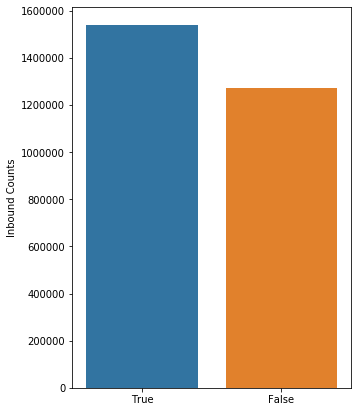

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = gf.index, y = gf['Inbound Counts'])
plt.rcParams['figure.figsize'] = [7,7]
plt.show()

Inbound Tweets are quite more, so people are tagging more in these tweets than companies.

In [ ]:
df1 = df[df.inbound == 0]  # non-Inbound tweets

In [ ]:
df1.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,0,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
3,4,sprintcare,0,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
5,6,sprintcare,0,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
7,11,sprintcare,0,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
9,15,sprintcare,0,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


In [ ]:
df1['text'] = df1['text'].apply(lambda x: re.sub('[^0-9@]',' ',x))

In [ ]:
df2 = df[df.inbound == 1]               # Inbound Tweets 
df22 = df2[~df2.text.str.contains('@')] # Inbound Tweets without @
df21 = df2[df2.text.str.contains('@')]  # Inbound Tweets with @
df22['text'] = df22['text'].apply(lambda x: x.lower()) # Lowering the texts

## Inbounds Tweets tagged without @

In [ ]:
df22.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,flag
2756004,29,115716,1,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,1
2756005,272,115770,1,Wed Nov 22 09:14:39 +0000 2017,amazonのfiretvstickが見れない😢,269,NaN,0
2756006,293,115769,1,Wed Oct 18 14:07:45 +0000 2017,whoa! come along with lightroom’s own ben ward...,292,NaN,1
2756007,325,115792,1,Wed Nov 22 08:55:35 +0000 2017,amazonプライムビデオ、再生エラーが多いです,324,NaN,0
2756008,348,115798,1,Mon Aug 29 03:20:05 +0000 2011,"lost your booking number? no worries, just dro...","349,350,351,352,347,353,354,355,356,357,358,35...",NaN,1


In [ ]:
arr1 = df1.author_id.unique()
ar = []
for i in arr1:
    ar.append(i.lower())

#### List of 108 Companies and their Twitter Handles

In [ ]:
arr1

array(['sprintcare', 'Ask_Spectrum', 'VerizonSupport', 'ChipotleTweets',
       'AskPlayStation', 'marksandspencer', 'MicrosoftHelps',
       'ATVIAssist', 'AdobeCare', 'AmazonHelp', 'XboxSupport',
       'AirbnbHelp', 'nationalrailenq', 'AirAsiaSupport', 'Morrisons',
       'NikeSupport', 'AskAmex', 'McDonalds', 'YahooCare', 'AskLyft',
       'UPSHelp', 'Delta', 'AppleSupport', 'Uber_Support', 'Tesco',
       'SpotifyCares', 'British_Airways', 'comcastcares', 'AmericanAir',
       'TMobileHelp', 'VirginTrains', 'SouthwestAir', 'AskeBay',
       'hulu_support', 'GWRHelp', 'sainsburys', 'AskPayPal', 'HPSupport',
       'ChaseSupport', 'CoxHelp', 'DropboxSupport', 'VirginAtlantic',
       'BofA_Help', 'AzureSupport', 'AlaskaAir', 'ArgosHelpers',
       'Postmates_Help', 'AskTarget', 'GoDaddyHelp', 'CenturyLinkHelp',
       'AskPapaJohns', 'SW_Help', 'askpanera', 'Walmart',
       'USCellularCares', 'AsurionCares', 'GloCare', 'idea_cares',
       'DoorDash_Help', 'NeweggService', 'VirginA

But, it has been noticed that the people tagging to companies without **@** are using base names of the companies. So, we have to extract the base names of the companies. 

#### Extracting the base Company names 

In [ ]:
lst1 = []
replace = ['care','cares' ,'support','assist','help','helps','support','tweets','ask','service','official']
for i in ar:
    for j in replace:
        if j in i:
            lst1.append(i.replace(j,''))

In [ ]:
lst2 = []
for i in lst1:
    if i in lst2:
        pass
    else:
        lst2.append(i)
        
import re
lst3 = []
for i in lst2:
     lst3.append(re.sub('[^a-z]','',i))        

lst3
lst4 = []
for i in range(len(lst3)-1):
    if (lst3[i] == lst3[i+1] + 's'):
        lst3[i] = 0
    elif (lst3[i+1] == lst3[i] + 's'):
        lst3[i+1] = 0

lst4 = [i for i in lst3 if i != 0]        
        
len(lst4)

80

In [ ]:
a = []
for i in ar:
    for j in lst4:
        if j in i:
            a.append(i)
            
a1 = []
for i in a:
    if i in a1:
        pass
    else:
        a1.append(i)
        
a2 = ar.copy()
for i in a1:
    a2.remove(i)

In [ ]:
lst4.extend(a2)

In [ ]:
rem = ['oppocarein','sizehelpteam', 'kfc_uki_help','argosers']
for i in rem:
    if i not in lst4:
        print(i)

In [ ]:
rem = ['oppocarein','sizehelpteam', 'kfc_uki_help','argosers']
for i in rem:
    lst4.remove(i)

In [ ]:
len(lst4)   ## Number is matching with the List of Companies Twitter Handle

108

In [ ]:
df22[df22.text.str.contains('ups')].head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,flag
5,605,115814,1,Tue Oct 31 21:57:56 +0000 2017,whats wrong w/ amazon leavin shit outside like...,604,NaN,0
19,1690,116080,1,Tue Oct 31 22:01:20 +0000 2017,saved my fucking time by just checking my mail...,1688,1691.0,0
45,3785,116628,1,Sun Nov 26 00:04:04 +0000 2017,-me erday waiting for ups https://t.co/bxr4od96t1,3784,NaN,0
256,16257,119568,1,Wed Nov 22 13:54:49 +0000 2017,"level with me, ups. you have no idea where my ...",16255,NaN,0
279,18018,120002,1,Wed Nov 01 03:49:25 +0000 2017,i thought ups would have an easier time delive...,18017,NaN,0


In [ ]:
dict7 = {'hoteltonightcx': 'hoteltonight', 'nationalrailenq':'railway', 'oppoin':'oppo', 'kfcuki':'kfc'}
for key,value in dict7.items():
    for i in range(len(lst4)):
        if lst4[i] == key:
            lst4[i] = value            

#### Company tags check in the texts without @ tagging for 108 companies

In [ ]:
for i in range(len(lst4)):
    print(len(df22[df22.text.str.contains(lst4[i])]) != 0,':', lst4[i])

True : sprint
True : spectrum
True : verizon
True : chipotle
True : playstation
True : microsoft
True : atvi
True : adobe
True : amazon
True : xbox
True : airbnb
True : airasia
True : nike
True : amex
True : yahoo
True : lyft
True : ups
True : apple
True : uber
True : spotify
True : comcast
True : tmobile
True : ebay
True : hulu
True : gwr
True : paypal
True : hp
True : chase
True : cox
True : dropbox
True : bofa
True : azure
False : alaair
True : postmates
True : target
True : godaddy
True : centurylink
True : papajohns
True : sw
True : panera
True : uscellular
True : asurion
True : glo
True : idea
True : doordash
True : newegg
True : safaricom
True : wellsfargo
True : salesforce
True : airtel
True : citi
True : ihg
True : boost
True : hilton
True : office
True : kfc
True : dell
True : twitter
True : greggs
True : rbc
True : arbys
True : norton
True : seagate
False : sizeteam
True : sc
True : dsc
True : virginmoney
True : robinhood
True : mtnc
True : aws
True : vmu
True : mediatemple


#### Flag tweets Counter

In [ ]:
count = 0
c = []
for j in df22.text:
    for i in lst4:
        if i not in j:
            count = count + 1      
    c.append(108 - count)
    count = 0

flag = []
for i in c:
    if i > 0:
        flag.append(0)
    else:
        flag.append(1)

In [ ]:
df22.index = np.arange(0,55770,1)

In [ ]:
df22['flag'] = pd.DataFrame(flag)

In [ ]:
df22.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,flag
0,29,115716,1,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,1
1,272,115770,1,Wed Nov 22 09:14:39 +0000 2017,amazonのfiretvstickが見れない😢,269,NaN,0
2,293,115769,1,Wed Oct 18 14:07:45 +0000 2017,whoa! come along with lightroom’s own ben ward...,292,NaN,1
3,325,115792,1,Wed Nov 22 08:55:35 +0000 2017,amazonプライムビデオ、再生エラーが多いです,324,NaN,0
4,348,115798,1,Mon Aug 29 03:20:05 +0000 2011,"lost your booking number? no worries, just dro...","349,350,351,352,347,353,354,355,356,357,358,35...",NaN,1


In [ ]:
de = pd.DataFrame(df22.flag.value_counts())
de.index = ['Tweets tagged to Company', 'Tweets to be flagged']
de.columns = ['No. of Inbounds without @']
de

,No. of Inbounds without @
Tweets tagged to Company,30715
Tweets to be flagged,25055


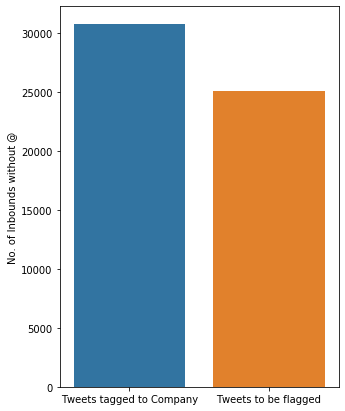

In [ ]:
sns.barplot(x = de.index, y = de['No. of Inbounds without @'])
plt.rcParams['figure.figsize'] = [5,7]

## Inbounds Tweets with tagged @

In [ ]:
# Flag Tweet Counter
count = 0
c1 = []
for j in df21.text:
    for i in lst4:
        if i not in j:
            count = count + 1      
    c1.append(108 - count)
    count = 0

flagg = []
for i in c1:
  if i > 0:
      flagg.append(0)
  else:
      flagg.append(1)

In [ ]:
df21.index = np.arange(0,1482073,1) 

In [ ]:
df21['flag'] = pd.DataFrame(flagg)    ## creating new column to represent flag tweets 

In [ ]:
df21.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,flag
0,2,115712,1,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,0
1,3,115712,1,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0,0
2,5,115712,1,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,0
3,8,115712,1,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,0
4,12,115713,1,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0,0


In [ ]:
de1 = pd.DataFrame(df21.flag.value_counts())
de1.index = ['Tweets to be flagged','Tweets tagged to Company']
de1.columns = ['No. of Inbounds with @']
de1

,No. of Inbounds with @
Tweets to be flagged,1120646
Tweets tagged to Company,361427


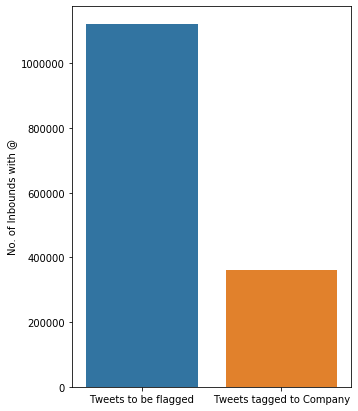

In [ ]:
sns.barplot(x = de1.index, y = de1['No. of Inbounds with @'])
plt.rcParams['figure.figsize'] = [5,7]

Thus, most of the tagged tweets are found to be unimportant and should be flagged

## Combined Inbound Tweets

In [ ]:
df6 = pd.concat([df21,df22],axis=0,ignore_index=True)

In [ ]:
df6.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,flag
0,2,115712,1,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,0
1,3,115712,1,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0,0
2,5,115712,1,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,0
3,8,115712,1,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,0
4,12,115713,1,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0,0


In [ ]:
de2 = pd.DataFrame(df6.flag.value_counts())
de2.index = ['Tweets to be flagged','Tweets tagged to Company']
de2.columns = ['No. of Inbounds']
de2

,No. of Inbounds
Tweets to be flagged,1145701
Tweets tagged to Company,392142


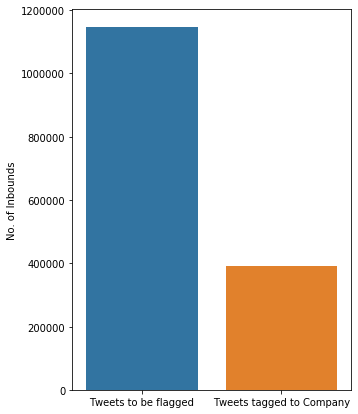

In [ ]:
sns.barplot(x = de2.index, y = de2['No. of Inbounds'])
plt.rcParams['figure.figsize'] = [5,7]

This is clearly an imbalanced dataset. Suprisingly, the inbound tweets have to be flagged the most.

## Combined all Tweets

In [ ]:
df1['flag'] = 0

In [ ]:
df1.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,flag
0,1,sprintcare,0,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,0
3,4,sprintcare,0,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,0
5,6,sprintcare,0,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0,0
7,11,sprintcare,0,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0,0
9,15,sprintcare,0,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0,0


In [ ]:
df9 = pd.concat([df1,df6],axis=0,ignore_index=True)

In [ ]:
df9.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,flag
0,1,sprintcare,0,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,0
1,4,sprintcare,0,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,0
2,6,sprintcare,0,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0,0
3,11,sprintcare,0,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0,0
4,15,sprintcare,0,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0,0


In [ ]:
de3 = pd.DataFrame(df9.flag.value_counts())
de3.index = ['Tweets tagged to Companies', 'Tweets to be flagged']
de3.columns = ['Total Counts']
de3

,Total Counts
Tweets tagged to Companies,1666073
Tweets to be flagged,1145701


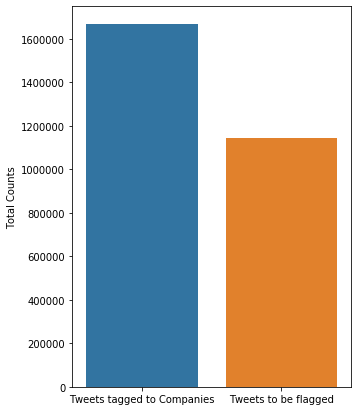

In [ ]:
sns.barplot(x = de3.index, y = de3['Total Counts'])
plt.rcParams['figure.figsize'] = [5,7]

 As, there ratio is $2:3$ between both of them, thus is this not that imbalanced. We, can perform Machine Learning/ Deep Learning classification tasks next without sampling methods. 

## Search Model to finding a Tweet to be flagged with known tagging (108 Comapanies)

In [ ]:
def tweet_flag_detector(text):
  # Flag Tweet Counter
  count = 0
  c1 = []
  for j in text:
    for i in lst4:
      if i not in j:
        count = count + 1      
    c1.append(108 - count)
    count = 0

  flagg = []
  for i in c1:
    if i > 0:
      flagg.append(0)
    else:
      flagg.append(1)
  return flagg   

  #if c1[0] == 0:
    #return 'No action needed'
  #else:
    #return 'Flag this tweet'

#### Checking the Performance of the Search Model

In [ ]:
pred = tweet_flag_detector(df11[df11.inbound == 1]['text'])
accuracy_score(df11[df11.inbound == 1]['flag'],pred)

0.4479533228825852

# Model Building for prediction of Tweets with unknown tagging & Author ID

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df9 = pd.read_csv('/content/drive/MyDrive/twitter.csv')

In [ ]:
df9.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df9.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,flag
0,1,sprintcare,0,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0,0
1,4,sprintcare,0,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0,0
2,6,sprintcare,0,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0,0
3,11,sprintcare,0,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0,0
4,15,sprintcare,0,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0,0


In [ ]:
token = []
for i in df9.text:
  token.append(len(i.split()))

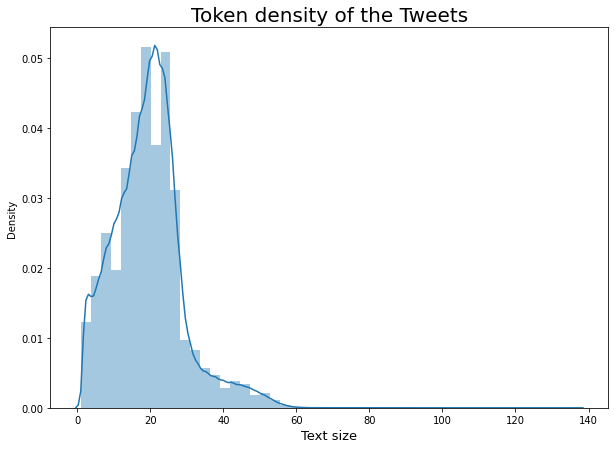

In [ ]:
sns.distplot(token)
plt.rcParams['figure.figsize'] = [10,7]
plt.title('Token density of the Tweets', size=20)
plt.xlabel('Text size', size=13)
plt.show()

Thus, most of the sentences have $20$ words and the sentences have the highest word counts close to $140$. So, we can choose a maximum padding of $150 - 200$ for tokenization of each sentence.

#### Text Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [ ]:
### Changing the object type to string type  
df9['text'] = df9['text'].apply(lambda x: str(x))
df9['author_id'] = df9['author_id'].apply(lambda x: str(x))

In [ ]:
df10 = df9.iloc[:,[1,2,4,-1]]

In [ ]:
import re
df10['text'] = df10['text'].apply(lambda x: re.sub('[^a-zA-Z0-9@]',' ',x))
df10['text'] = df10['text'].apply(lambda x: x.lower())

In [ ]:
df10.head()

,author_id,inbound,text,flag
0,sprintcare,0,@115712 i understand i would like to assist y...,0
1,sprintcare,0,@115712 please send us a private message so th...,0
2,sprintcare,0,@115712 can you please send us a private messa...,0
3,sprintcare,0,@115713 this is saddening to hear please shoo...,0
4,sprintcare,0,@115713 we understand your concerns and we d l...,0


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df21 = df10[df10.inbound == 0]
df21['text'] = df21['text'].apply(lambda x: re.sub('[^0-9@]',' ',x))

In [ ]:
df23 = df10[df10.inbound == 1]
df23['text'] = df23['text'].apply(lambda x: re.sub('[^a-z@]',' ',x))

In [ ]:
df10 = pd.concat([df23, df21], axis=0, ignore_index=True)

In [ ]:
df10.head()

,author_id,inbound,text,flag
0,115712,1,@sprintcare and how do you propose we do that,0
1,115712,1,@sprintcare i have sent several private messag...,0
2,115712,1,@sprintcare i did,0
3,115712,1,@sprintcare is the worst customer service,0
4,115713,1,@sprintcare you gonna magically change your co...,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
df11 = df10.sample(frac=0.1)

In [ ]:
df11.flag.value_counts()

0    166714
1    114463
Name: flag, dtype: int64

In [ ]:
corpus = []
for i in df11['text']:
  review = i.split()
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

In [ ]:
import gc
gc.collect()

44

##### Function for Plotting the Confusion Matrix

In [ ]:
def plot_confusion_matrix(model,x_test,y_test):
  y_pred = model.predict(x_test)
  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm,annot=True,fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

## Multinomial Naive Bayes

#### Creating the Word vectors based on Monograms

In [ ]:
cv = CountVectorizer(max_features=1000) 
X = cv.fit_transform(list(df11.text)).toarray()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,df11.iloc[:,-1], test_size=0.3)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
model = naive_bayes.fit(x_train,list(y_train))

In [ ]:
model.score(x_test,list(y_test))

0.872383052374517

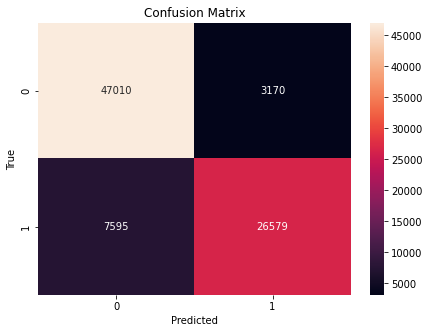

In [ ]:
plot_confusion_matrix(model,x_test,list(y_test))
plt.rcParams['figure.figsize'] = [7,5]

The Confusion Matrix is shown here by a density plot, the blakish it is the less in number. Here, the diagonal elements are the correctly predicted and the color is lighter, so this model can be considered as a good classifier. The Type-I and Type-II errors are still less in number.

#### Classification Report:

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     50180
           1       0.89      0.78      0.83     34174

    accuracy                           0.87     84354
   macro avg       0.88      0.86      0.86     84354
weighted avg       0.87      0.87      0.87     84354



 #### Results:
 **The f-score is in between $0.83-0.9$, thus this model is performing good on binary text classification. We can expect better results.**

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rf.score(x_test, y_test)

0.9334827038433269

The accuracy is around $93.3\%$, that means out model is able to classify the tweets to be flagged or not. This shows the effeciency of the **bagged** model towards binary text classification.  

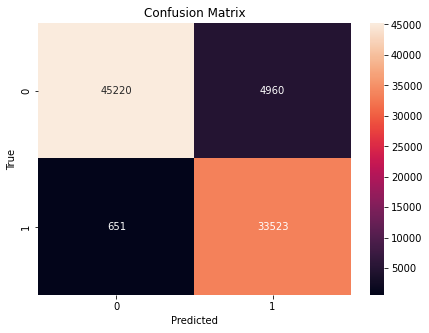

In [ ]:
plot_confusion_matrix(rf,x_test,list(y_test))

The Confusion Matrix shows how many predictions are correct or not. Here, the diagonal elements are the correctly predicted, whereas the off-diagnoal elements are not correctly predicted. The off-diagonal terms are called **Type-I** and **Type-II** errors. 

#### Classification Report:

In [ ]:
y_pred2 = rf.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     50180
           1       0.87      0.98      0.92     34174

    accuracy                           0.93     84354
   macro avg       0.93      0.94      0.93     84354
weighted avg       0.94      0.93      0.93     84354



#### Results:
**The f1-score is in range $0.92-0.94$, thus its performing better than Multinomail Naive Bayes. We can say that this model has $92\%$ percent accuracy over detecting the flagged text.** 

## Gradiant Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
gb.score(x_test, y_test)

0.8382293667164569

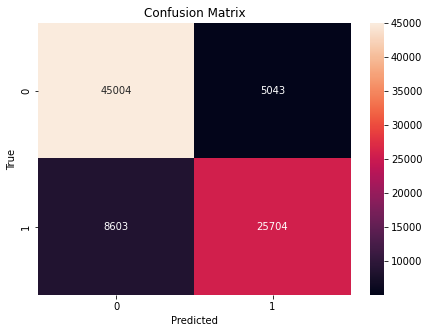

In [ ]:
plot_confusion_matrix(gb,x_test,list(y_test))
plt.rcParams['figure.figsize'] = [7,5]

The Confusion matrix for this model is not as good as **Random Forest**, as the off-diagonal elements are more in number. This means here we have more **Type-I and Type-II error** and thus we expect lesser **f1-score**.

#### Classification Report

In [ ]:
y_pred3 = gb.predict(x_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87     50047
           1       0.84      0.75      0.79     34307

    accuracy                           0.84     84354
   macro avg       0.84      0.82      0.83     84354
weighted avg       0.84      0.84      0.84     84354



#### Results:
**The f1-score is in the range $0.79-0.87$, so the difference is huge for predicting the flaggged and not flagged. This is not the best model, because of the same**.

## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

AdaBoostClassifier()

In [ ]:
ada.score(x_test, y_test)

0.8438841074519288

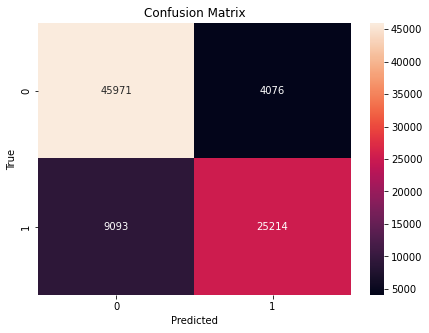

In [ ]:
plot_confusion_matrix(ada,x_test,list(y_test))
plt.rcParams['figure.figsize'] = [7,5]

In [ ]:
y_pred4 = ada.predict(x_test)
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     50047
           1       0.86      0.73      0.79     34307

    accuracy                           0.84     84354
   macro avg       0.85      0.83      0.83     84354
weighted avg       0.85      0.84      0.84     84354



####Results:
**The f1-score is not very different from 'Gradiant Boost', so we expect similar accuracy for both of them. The perform is not bad but we can expect better f1-score from other models**.

## Majority Voting Ensemble Technique 

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB 
c1 = AdaBoostClassifier()
c2 = GradientBoostingClassifier()
c3 = MultinomialNB()
c4 = RandomForestClassifier()
estimators = [('Ada',c1),('Random Forest',c4),('Gradiant Boost', c2),('Naive',c3)]
ensbl = VotingClassifier(estimators = estimators, voting = 'hard')
ensbl.fit(x_train,y_train)
pre_v = ensbl.predict(x_test)

In [ ]:
ensbl.score(x_test,y_test)

0.8606349432154966

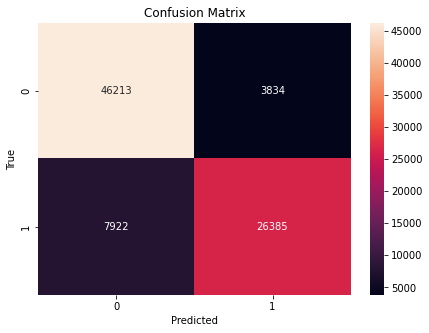

In [ ]:
plot_confusion_matrix(ensbl,x_test,list(y_test))
plt.rcParams['figure.figsize'] = [7,5]

#### Classification Report 

In [ ]:
print(classification_report(y_test,pre_v))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89     50047
           1       0.87      0.77      0.82     34307

    accuracy                           0.86     84354
   macro avg       0.86      0.85      0.85     84354
weighted avg       0.86      0.86      0.86     84354



#### Results:
**The best f1-score in here is $0.86$ which is baised towards 'boosted' models, than the 'bagged' model. This makes our model little underfitted. We can include only one of the 'boosted' model to improve the overall accuracy**. 

## Comparing different models based on performance

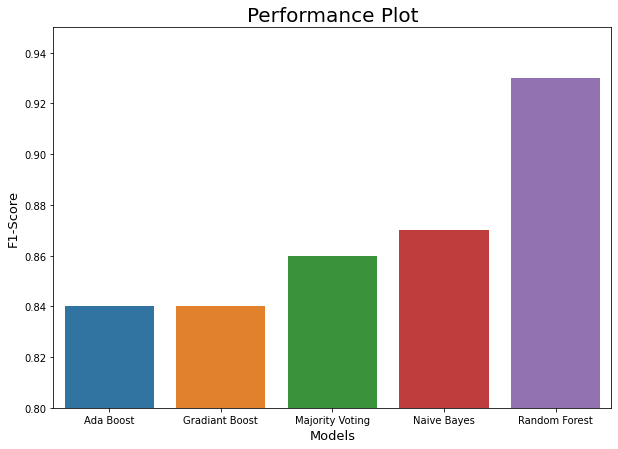

In [ ]:
list1 = [ 0.84, 0.84, 0.86 ,0.87, 0.93]
list2 = ['Ada Boost','Gradiant Boost','Majority Voting','Naive Bayes', 'Random Forest']
sns.barplot(y = list1, x = list2)
plt.ylim([0.8,0.95])
plt.ylabel('F1-Score',size=13)
plt.xlabel('Models',size=13)
plt.rcParams['figure.figsize'] = [10,7]
plt.title('Performance Plot',size=20)
plt.show()

### Final Result:
**The 'Random Forest Classifier' is the best model as per the test data, but this mayn't always perform best. So, we will also save  'Majority Voting Model', beacause average-model can be handy for generalization**.

## Saving the models

In [ ]:
### Saving the best model
import pickle 
with open('Twitter_rf', 'wb') as files:
    pickle.dump(rf, files)

In [ ]:
### Saving the average model
with open('Twitter_mv', 'wb') as files:
    pickle.dump(ensbl, files)